## Importing Libraries

In [1]:
# Machine Learning Libraries
from sklearn.metrics import confusion_matrix,  recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import pickle

# Data Processing Libraries
import warnings
import time

import pandas as pd
import numpy as np

from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

## Data Preprocessing

In [12]:
df = pd.read_parquet("newData.parquet")

In [3]:
display(md(f'#### Rows ${df.shape[0]}$ | Columns ${df.shape[1]}$\n---'))
df.sample(20)

#### Rows $1220336$ | Columns $19$
---

,target,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Origin,Dest,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,SNOW_D
1182022,1.0,2022,2,6,20,1,DL,DFW,LAX,1235.0,16,47,0,307.0,34,0,211.0,0.0,0.0
1193317,0.0,2022,2,6,30,4,AA,CLT,DFW,936.0,13,21,0,261.0,35,0,297.0,0.0,0.0
253171,0.0,2019,1,1,8,2,UA,DEN,ATL,1199.0,12,49,0,19.0,36,0,141.0,0.0,0.0
339102,0.0,2019,4,12,27,5,UA,DFW,DEN,641.0,20,31,0,162.0,21,0,-23.0,0.0,0.0
543384,0.0,2019,3,9,4,3,AA,DFW,LAX,1235.0,7,18,0,303.0,35,0,250.0,0.0,0.0
768133,0.0,2020,3,9,7,1,AA,PHX,ORD,1440.0,12,35,0,366.0,55,58,243.0,0.0,0.0
170110,0.0,2018,3,7,10,2,OO,LAX,PHX,370.0,10,35,0,250.0,28,23,279.0,0.0,0.0
593144,0.0,2020,4,10,25,7,UA,DEN,PHX,602.0,13,58,46,-61.0,38,0,249.0,74.0,0.0
225164,0.0,2018,3,9,23,7,UA,SFO,LAX,337.0,7,50,0,147.0,32,0,201.0,0.0,0.0
1031623,0.0,2021,3,9,13,1,OO,LAX,SFO,337.0,6,31,0,177.0,59,0,171.0,0.0,0.0


### Supporting Functions

In [5]:
def split_data(data):
    train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])
    return train, test

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from IPython.display import Markdown as md, display
import pandas as pd
import numpy as np

def calculate_metrics(test_labels, target_predicted):
    labels = [0, 1, 2, 3, 4]
    
    # Calculate metrics
    Precision = precision_score(test_labels, target_predicted, average=None, labels=labels) * 100
    Recall = recall_score(test_labels, target_predicted, average=None, labels=labels) * 100
    F1_Score = f1_score(test_labels, target_predicted, average=None, labels=labels) * 100
    Accuracy = accuracy_score(test_labels, target_predicted) * 100
    
    # Create DataFrame to display the metrics in table format
    metrics_df = pd.DataFrame({
        'Label': labels,
        'Precision (%)': Precision,
        'Recall (%)': Recall,
        'F1 Score (%)': F1_Score
    })
    
    display(md("### Metrics for each class"))
    display(metrics_df)
    
    display(md(f"### Overall Accuracy: {round(Accuracy, 2)}%"))
    
    # Calculate ROC and AUC
    plot_roc(test_labels, target_predicted, labels)

def plot_roc(test_labels, target_predicted, labels):
    # Binarize the labels for ROC calculation
    test_labels_binarized = label_binarize(test_labels, classes=labels)
    target_predicted_binarized = label_binarize(target_predicted, classes=labels)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, label in enumerate(labels):
        fpr[label], tpr[label], _ = roc_curve(test_labels_binarized[:, i], target_predicted_binarized[:, i])
        roc_auc[label] = roc_auc_score(test_labels_binarized[:, i], target_predicted_binarized[:, i])
    
    # Plot ROC curve
    plt.figure()
    for i, label in enumerate(labels):
        plt.plot(fpr[label], tpr[label], label=f'{label} (area = {roc_auc[label]:0.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [21]:
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline ', 'Origin', 'Dest']

for c in categorical_columns:
    df[c] = df[c].astype('category')

In [22]:
df_dummies = pd.get_dummies(df[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline ', 'Origin', 'Dest']])
df = pd.concat([df, df_dummies], axis = 1)
df.drop(categorical_columns,axis=1, inplace=True)
df.drop("Year",axis=1, inplace=True)

In [ ]:
df["target"] = df["target"].astype('category').cat.codes

In [23]:
display(md(f'#### Rows ${df.shape[0]}$ | Columns ${df.shape[1]}$\n---'))
df.sample(10)

#### Rows $1220336$ | Columns $88$
---

,target,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,SNOW_D,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_1,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Operating_Airline _AA,Operating_Airline _DL,Operating_Airline _OO,Operating_Airline _UA,Operating_Airline _WN,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_IAH,Origin_LAX,Origin_ORD,Origin_PHX,Origin_SFO,Dest_ATL,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
475083,4,801.0,17,22,71,255.0,40,0,217.0,0.0,0.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
254757,0,888.0,8,49,0,-1.0,50,0,-36.0,0.0,0.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
783627,0,370.0,15,26,0,184.0,22,0,174.0,0.0,0.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
200618,0,967.0,5,51,97,213.0,58,0,152.0,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
54687,0,1773.0,11,15,0,168.0,32,0,38.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
98467,4,1773.0,13,27,196,86.0,28,0,92.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,F

In [24]:
train, test = split_data(df)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print('Train\n', train['target'].value_counts(), '\n')
print('Test\n', test['target'].value_counts(), '\n')

Train
 target
0    799230
1     65353
4     57677
2     33315
3     20693
Name: count, dtype: int64 

Test
 target
0    199808
1     16338
4     14419
2      8329
3      5174
Name: count, dtype: int64 



# Machine Learning Models

## Decision Tree

In [25]:
dt = DecisionTreeClassifier()

start = time.time()
dt.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())
end = time.time()

display(md(f'Duration: {round((end - start)/60, 2)} Min.'))

Duration: 0.99 Min.

In [27]:
real = test.iloc[:,:1]
pred = dt.predict(test.iloc[:,1:])

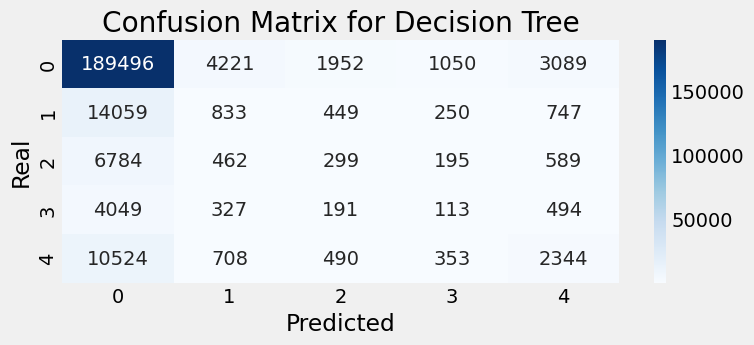

### Metrics for each class

,Label,Precision (%),Recall (%),F1 Score (%)
0,0,84.253397,94.839045,89.233377
1,1,12.715616,5.098543,7.278605
2,2,8.843537,3.589867,5.106746
3,3,5.762366,2.183997,3.167484
4,4,32.273165,16.256328,21.621622


### Overall Accuracy: 79.11%

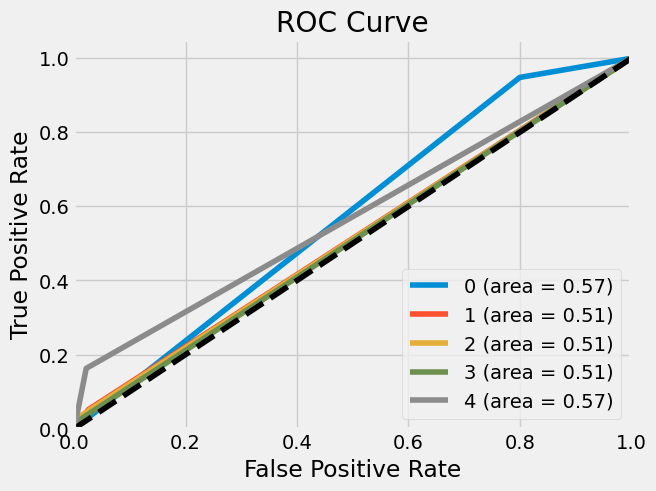

In [37]:
conf_matrix = confusion_matrix(real, pred)

plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

calculate_metrics(real, pred)

In [39]:
with open('trained_models/dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

## Random Forest Classifier

In [31]:
n_estimators = 50  

rf = RandomForestClassifier(n_estimators=n_estimators, random_state=47)

start = time.time()
rf.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())
end = time.time()

display(md(f'Duration: {round((end - start)/60, 2)} Min.'))

Duration: 3.38 Min.

In [32]:
real = test.iloc[:,:1]
pred = rf.predict(test.iloc[:,1:])

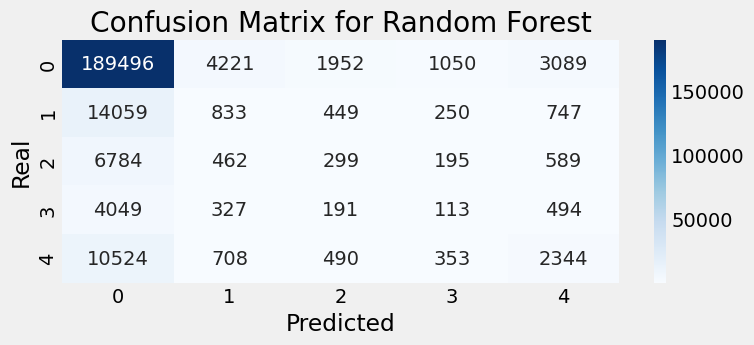

### Metrics for each class

,Label,Precision (%),Recall (%),F1 Score (%)
0,0,84.253397,94.839045,89.233377
1,1,12.715616,5.098543,7.278605
2,2,8.843537,3.589867,5.106746
3,3,5.762366,2.183997,3.167484
4,4,32.273165,16.256328,21.621622


### Overall Accuracy: 79.11%

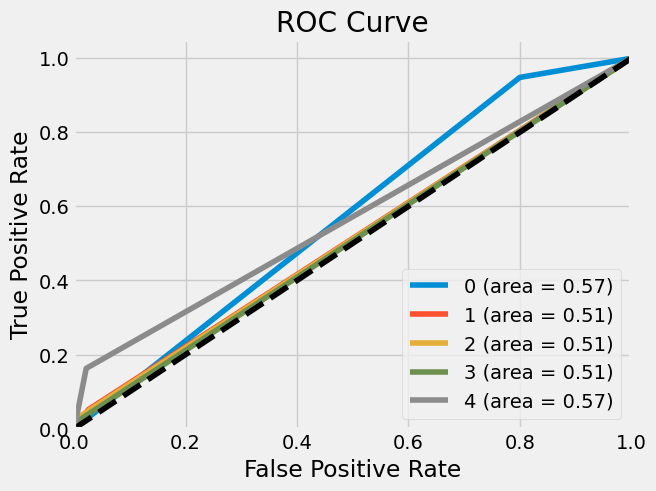

In [36]:
conf_matrix = confusion_matrix(real, pred)

plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Random Forest')
plt.show()

calculate_metrics(real, pred)

In [38]:
with open('trained_models/rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

## Logistic Regression

In [40]:
lr = LogisticRegression(C=1.0,n_jobs=-1,verbose=1, random_state=154)

start = time.time()
lr.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())
end = time.time()

display(md(f'Duration: {round((end - start)/60, 2)} Min.'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Duration: 0.84 Min.

In [41]:
real = test.iloc[:,:1]
pred = lr.predict(test.iloc[:,1:])

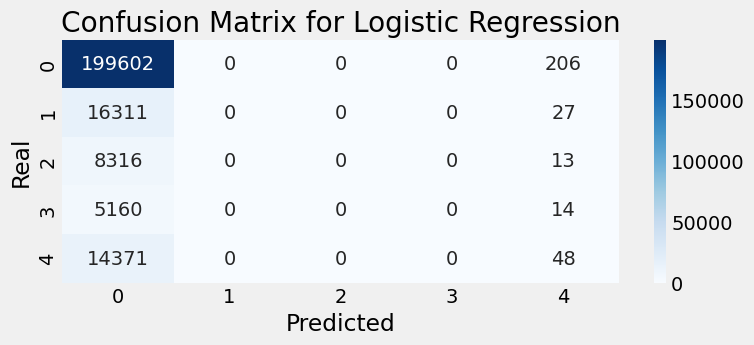

### Metrics for each class

,Label,Precision (%),Recall (%),F1 Score (%)
0,0,81.884641,99.896901,89.998377
1,1,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000
4,4,15.584416,0.332894,0.651864


### Overall Accuracy: 81.8%

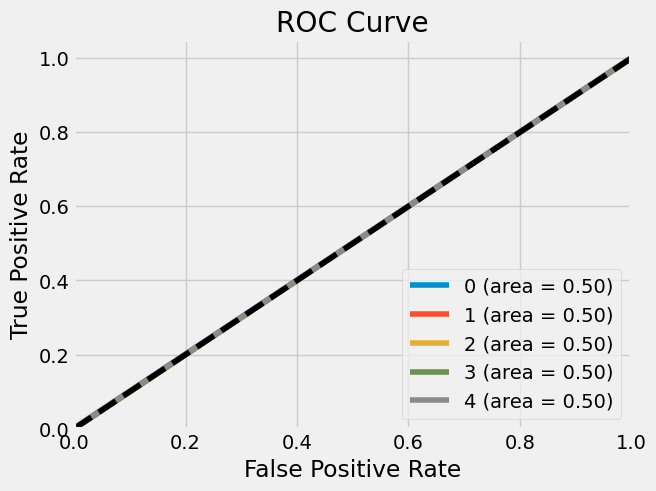

In [42]:
conf_matrix = confusion_matrix(real, pred)

plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

calculate_metrics(real, pred)

In [43]:
with open('trained_models/lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

## Gaussian Naive Bayes

In [44]:
nb = GaussianNB()

start = time.time()
nb.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())
end = time.time()

display(md(f'Duration: {round((end - start)/60, 2)} Min.'))

Duration: 0.05 Min.

In [45]:
real = test.iloc[:,:1]
pred = nb.predict(test.iloc[:,1:])

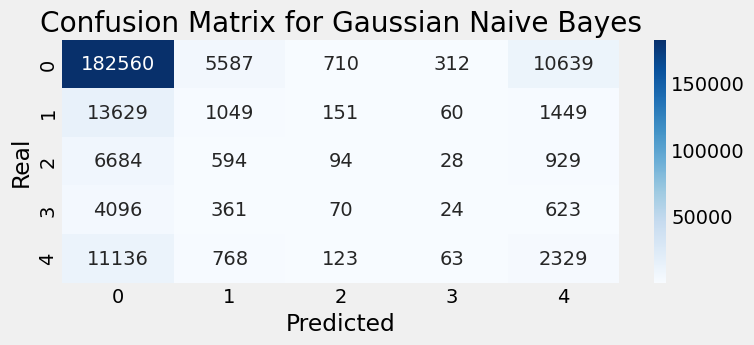

### Metrics for each class

,Label,Precision (%),Recall (%),F1 Score (%)
0,0,83.702804,91.367713,87.367466
1,1,12.549348,6.420615,8.494959
2,2,8.188153,1.128587,1.983750
3,3,4.928131,0.463858,0.847907
4,4,14.584507,16.152299,15.328419


### Overall Accuracy: 76.23%

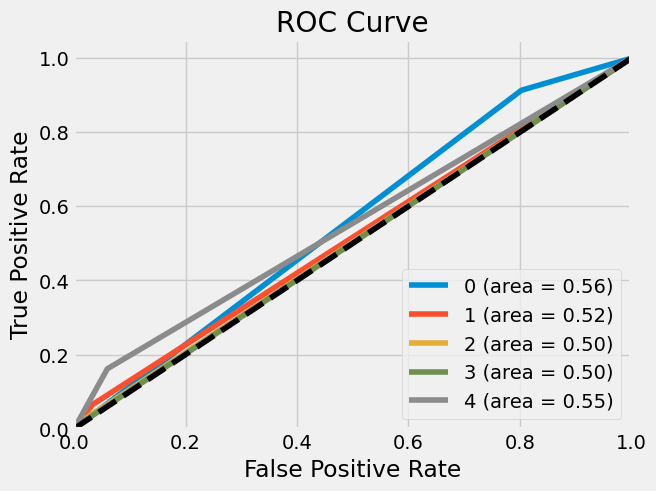

In [46]:
conf_matrix = confusion_matrix(real, pred)

plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

calculate_metrics(real, pred)

In [47]:
with open('trained_models/nb.pkl', 'wb') as f:
    pickle.dump(nb, f)

## Gradient Boost Classifier

In [48]:
gb = GradientBoostingClassifier()

start = time.time()
gb.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())
end = time.time()

display(md(f'Duration: {round((end - start)/60, 2)} Min.'))

Duration: 29.45 Min.

In [49]:
real = test.iloc[:,:1]
pred = gb.predict(test.iloc[:,1:])

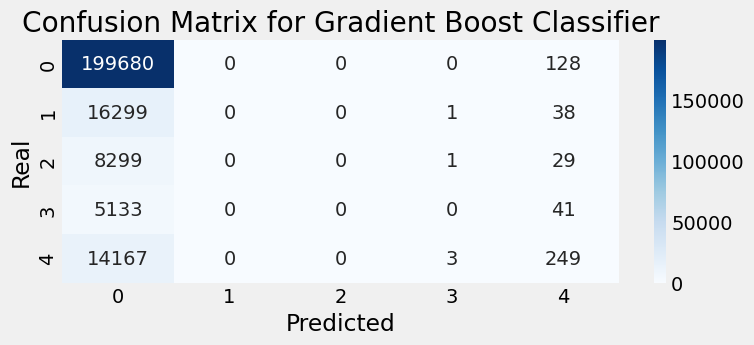

### Metrics for each class

,Label,Precision (%),Recall (%),F1 Score (%)
0,0,81.977847,99.935939,90.070503
1,1,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000
4,4,51.340206,1.726888,3.341385


### Overall Accuracy: 81.92%

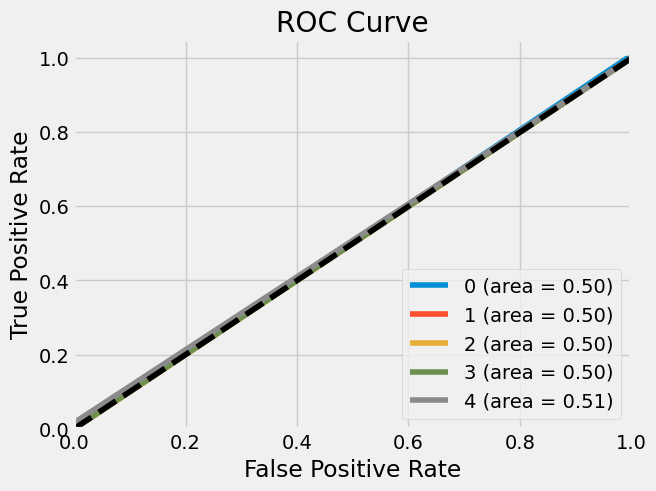

In [50]:
conf_matrix = confusion_matrix(real, pred)

plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Gradient Boost Classifier')
plt.show()

calculate_metrics(real, pred)

In [51]:
with open('trained_models/gradient_boost_model.pkl', 'wb') as f:
    pickle.dump(gb, f)